In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import category_encoders as ce
from sklearn.metrics import accuracy_score, f1_score
from sklearn.tree import DecisionTreeClassifier

## Loading Data

In [2]:
df = pd.read_csv('./data/car_evaluation.csv', header=None)

# Optional: Work with indexes in case required ....
df.columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [3]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


## Checking for null values in dataset

In [4]:
df.isna().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

## Feature and Prediction Segregation

In [5]:
X = df.drop('class', axis=1)
y = df['class']

In [6]:
X.shape, y.shape

((1728, 6), (1728,))

## Splitting of Data set into Train and Test Set

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model Training

## Data Count View

In [8]:
X_train.shape, X_test.shape

((1209, 6), (519, 6))

## Encoding Variables

In [9]:
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot','safety'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [10]:
X_train

,buying,maint,doors,persons,lug_boot,safety
1178,1,1,1,1,1,1
585,2,2,2,2,2,2
1552,3,1,2,1,3,3
1169,1,1,1,3,1,1
1033,1,2,3,3,1,3
...,...,...,...,...,...,...
1130,1,1,2,2,3,1
1294,1,4,1,2,1,3
860,2,4,1,2,3,1
1459,3,2,3,3,2,3


In [11]:
X_test

,buying,maint,doors,persons,lug_boot,safety
599,2,2,3,3,3,1
1201,1,4,4,1,3,3
628,2,2,1,3,1,3
1498,3,2,1,1,3,3
1263,1,4,3,2,3,2
...,...,...,...,...,...,...
490,2,3,3,3,3,3
1277,1,4,1,3,1,1
287,4,1,3,1,1,1
1639,3,4,4,2,2,3


In [12]:
classifier_gini = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=0)
classifier_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [13]:
classifier_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)
classifier_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)

## Make Predictions based on Created Classifiers .....

In [14]:
y_pred_gini = classifier_gini.predict(X_test)
y_pred_entropy = classifier_entropy.predict(X_test)

In [15]:
## Accuracy Calculation ...
acc_gini = round(accuracy_score(y_test, y_pred_gini), 3)
acc_entropy = round(accuracy_score(y_test, y_pred_entropy), 3)
acc_gini, acc_entropy

(0.827, 0.834)

In [16]:
## Generating a Confusion Metrics
from sklearn.metrics import confusion_matrix
cm_gini = confusion_matrix(y_test, y_pred_gini)
cm_entropy = confusion_matrix(y_test, y_pred_entropy)

Text(0.5, 81.72222222222219, 'Actuals')

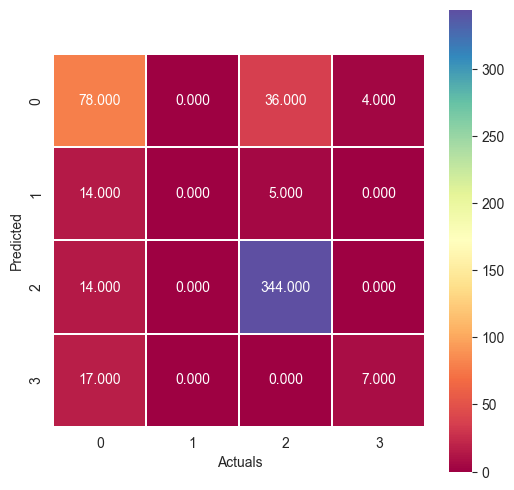

In [17]:
plt.figure(figsize=(6, 6))
sns.heatmap(cm_gini, annot=True, fmt='0.3f', linewidth=0.1, square=True, cmap='Spectral')
plt.ylabel('Predicted')
plt.xlabel('Actuals')

Text(0.5, 81.72222222222219, 'Actuals')

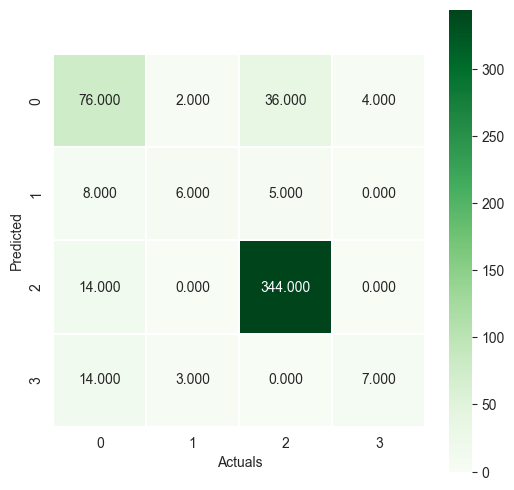

In [18]:
plt.figure(figsize=(6, 6))
sns.heatmap(cm_entropy, annot=True, fmt='0.3f', linewidth=0.1, square=True, cmap='Greens')
plt.ylabel('Predicted')
plt.xlabel('Actuals')

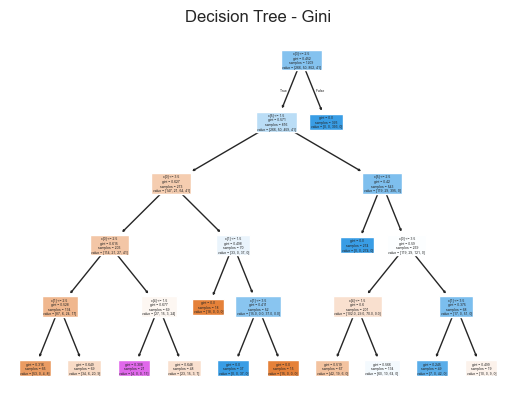

In [19]:
## Plotting the Decision Tree Itself ....
from sklearn.tree import plot_tree

plt.figure()
plot_tree(classifier_gini, filled=True)
plt.title('Decision Tree - Gini')
plt.savefig('./figures/classifier/tree_gini.png', dpi=3200)

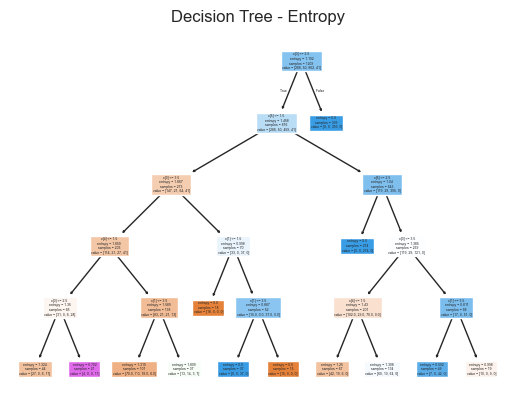

In [20]:
plt.figure()
plot_tree(classifier_entropy, filled=True)
plt.title('Decision Tree - Entropy')
plt.savefig('./figures/classifier/tree_entropy.png', dpi=3200)

In [21]:
f1_score_gini = f1_score(y_test, y_pred_gini, average='weighted')
f1_score_gini

np.float64(0.8043951248383027)